<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/drive')

plt.rcParams['figure.figsize'] = (12, 8)

sns.set_theme()
sns.set_style()


Mounted at /drive


In [2]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/4. Basic Artificial Neural Networks - ANNs/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df['pub_rec_bankruptcies'].nunique()

9

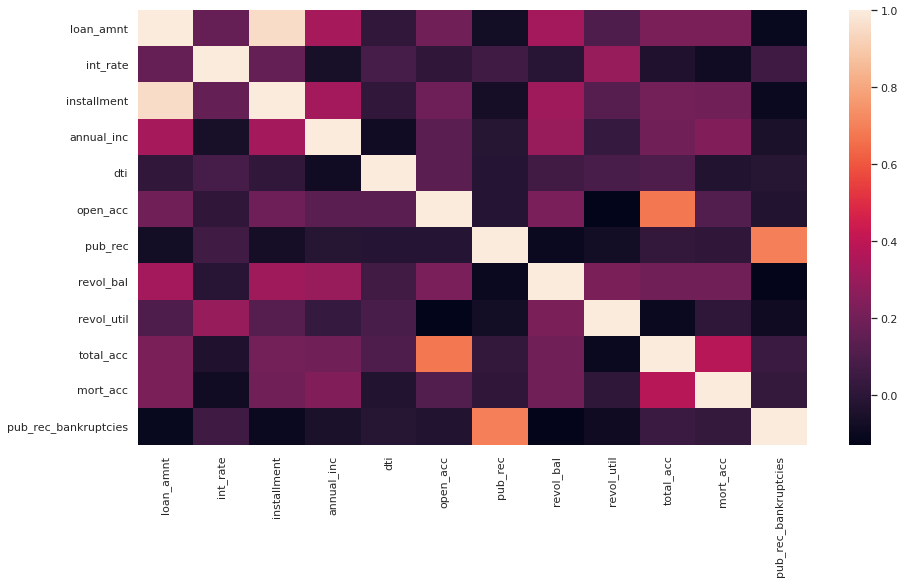

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr())

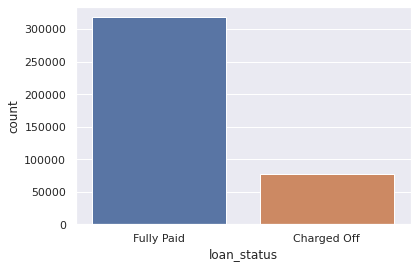

In [ ]:
sns.countplot(x = 'loan_status', data = df)

In [ ]:
df.corr().columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [3]:
def loan_status_to_int(x):
  if x == 'Fully Paid':
    return 1
  else:
    return 0

df['loan_status'] = df['loan_status'].apply(loan_status_to_int)

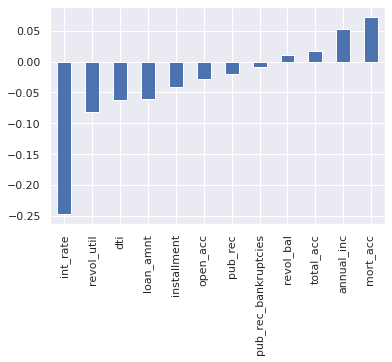

In [ ]:
df.corr()['loan_status'].sort_values()[:-1].plot(kind = 'bar')

In [ ]:
# can remove title and use purpose instead; from address extract zipcode and state; drop earliest_cr_line; 

In [ ]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [4]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [ ]:
from sklearn.model_selection import train_test_split

X = df[df.corr().columns].drop(['loan_status', 'mort_acc', ], axis = 1).values
y = df['loan_status'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.4658 - val_loss: 0.4613
Epoch 2/100
8664/8664 [==============================] - 15s 2ms/step - loss: 0.4585 - val_loss: 0.4611
Epoch 3/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.4574 - val_loss: 0.4589
Epoch 4/100
8664/8664 [==============================] - 15s 2ms/step - loss: 0.4562 - val_loss: 0.4581
Epoch 5/100
8664/8664 [==============================] - 15s 2ms/step - loss: 0.4553 - val_loss: 0.4574
Epoch 6/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.4545 - val_loss: 0.4563
Epoch 7/100
8664/8664 [==============================] - 15s 2ms/step - loss: 0.4540 - val_loss: 0.4567
Epoch 8/100
8664/8664 [==============================] - 15s 2ms/step - loss: 0.4537 - val_loss: 0.4558
Epoch 9/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.4536 - val_loss: 0.4556
Epoch 10/100
8664/8664 [==============================] - 18s 2m

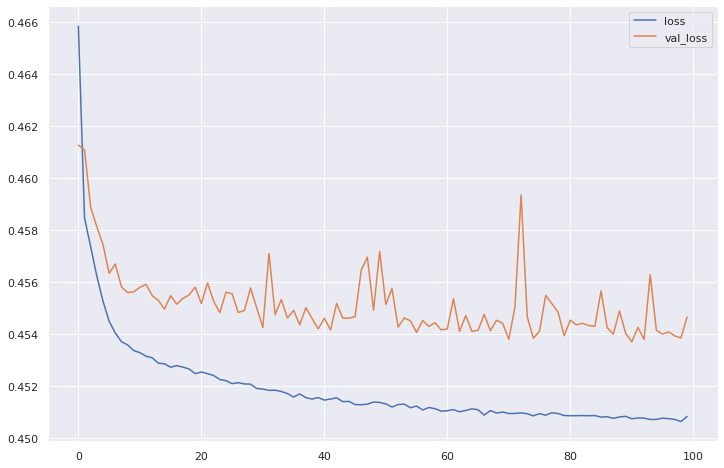

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, (predictions > 0.5).astype("int32"))

array([[ 2200, 21170],
       [ 2158, 93281]])

In [ ]:
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       0.50      0.09      0.16     23370
           1       0.82      0.98      0.89     95439

    accuracy                           0.80    118809
   macro avg       0.66      0.54      0.52    118809
weighted avg       0.75      0.80      0.75    118809



**This model Predicted correctly 9.4% of total False(0) values and 97% correctly of total True(1) values**

In [ ]:
y_test.shape

(118809,)

## Another way

**Adding Dense Layer**

**This model Predicted correctly 36.8% of total False(0) values and 100% correctly of total True(1) 100**

In [5]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [6]:
df['Postal'] = df['address'].apply(lambda x: int(x[-5:]))

In [7]:
df['state'] = df['address'].apply(lambda x: x[-8:-6])

In [8]:
df['Postal'].isnull().sum()

0

In [9]:
states = pd.get_dummies(df['state'], drop_first = True)

df = pd.concat([df, states], axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df[df.corr().columns].drop(['loan_status', 'mort_acc'], axis = 1).values
y = df['loan_status'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [12]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
8664/8664 [==============================] - 20s 2ms/step - loss: 0.4296 - val_loss: 0.3727
Epoch 2/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3821 - val_loss: 0.3653
Epoch 3/100
8664/8664 [==============================] - 19s 2ms/step - loss: 0.3585 - val_loss: 0.3332
Epoch 4/100
8664/8664 [==============================] - 17s 2ms/step - loss: 0.3465 - val_loss: 0.3294
Epoch 5/100
8664/8664 [==============================] - 19s 2ms/step - loss: 0.3394 - val_loss: 0.3165
Epoch 6/100
8664/8664 [==============================] - 17s 2ms/step - loss: 0.3316 - val_loss: 0.3077
Epoch 7/100
8664/8664 [==============================] - 19s 2ms/step - loss: 0.3302 - val_loss: 0.3106
Epoch 8/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3301 - val_loss: 0.3092
Epoch 9/100
8664/8664 [==============================] - 17s 2ms/step - loss: 0.3297 - val_loss: 0.3060
Epoch 10/100
8664/8664 [==============================] - 19s 2m

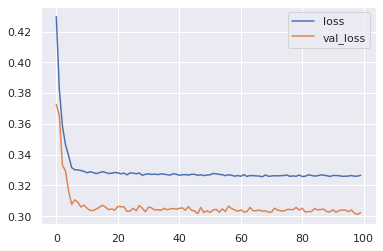

In [13]:
looses = pd.DataFrame(model.history.history)

looses.plot()

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, (predictions > 0.5).astype("int32"))

array([[ 8615, 14755],
       [    0, 95439]])

In [16]:
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54     23370
           1       0.87      1.00      0.93     95439

    accuracy                           0.88    118809
   macro avg       0.93      0.68      0.73    118809
weighted avg       0.89      0.88      0.85    118809



##Another Way

**Normal Configuration**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()

model.add(Dense(12, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [54]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
8664/8664 [==============================] - 19s 2ms/step - loss: 0.3610 - val_loss: 0.3448
Epoch 2/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3606 - val_loss: 0.3423
Epoch 3/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.3613 - val_loss: 0.3424
Epoch 4/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3609 - val_loss: 0.3429
Epoch 5/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.3607 - val_loss: 0.3443
Epoch 6/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3609 - val_loss: 0.3426
Epoch 7/100
8664/8664 [==============================] - 16s 2ms/step - loss: 0.3602 - val_loss: 0.3417
Epoch 8/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3603 - val_loss: 0.3437
Epoch 9/100
8664/8664 [==============================] - 18s 2ms/step - loss: 0.3599 - val_loss: 0.3423
Epoch 10/100
8664/8664 [==============================] - 18s 2m

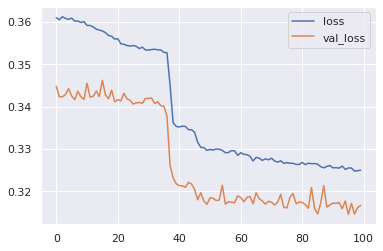

In [55]:
looses = pd.DataFrame(model.history.history)

looses.plot()

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, (predictions > 0.5).astype("int32"))

array([[ 7488, 15882],
       [   75, 95364]])

In [58]:
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       0.99      0.32      0.48     23370
           1       0.86      1.00      0.92     95439

    accuracy                           0.87    118809
   macro avg       0.92      0.66      0.70    118809
weighted avg       0.88      0.87      0.84    118809



**This model Predicted correctly 43.81% of total False(0) values and 99.79% correctly of total True(1) values**

##K Statified Approach

**Stratified with Dense Layer**


**This model Predicted correctly 28.4% of total False(0) values and 99.99% correctly of total True(1) values**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df[df.corr().columns].drop(['loan_status', 'mort_acc'], axis = 1).values
y = df['loan_status'].values



skf = StratifiedKFold(n_splits=3, shuffle=True)

for index, (train_indeces, test_indeces) in enumerate(skf.split(X, y)):
  X_train, y_train = X[train_indeces], y[train_indeces]
  X_test, y_test = X[test_indeces], y[test_indeces]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [19]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
8251/8251 [==============================] - 19s 2ms/step - loss: 0.4363 - val_loss: 0.3776
Epoch 2/100
8251/8251 [==============================] - 16s 2ms/step - loss: 0.3831 - val_loss: 0.3608
Epoch 3/100
8251/8251 [==============================] - 18s 2ms/step - loss: 0.3611 - val_loss: 0.3376
Epoch 4/100
8251/8251 [==============================] - 18s 2ms/step - loss: 0.3534 - val_loss: 0.3352
Epoch 5/100
8251/8251 [==============================] - 18s 2ms/step - loss: 0.3527 - val_loss: 0.3341
Epoch 6/100
8251/8251 [==============================] - 16s 2ms/step - loss: 0.3514 - val_loss: 0.3339
Epoch 7/100
8251/8251 [==============================] - 18s 2ms/step - loss: 0.3513 - val_loss: 0.3351
Epoch 8/100
8251/8251 [==============================] - 18s 2ms/step - loss: 0.3499 - val_loss: 0.3333
Epoch 9/100
8251/8251 [==============================] - 16s 2ms/step - loss: 0.3494 - val_loss: 0.3322
Epoch 10/100
8251/8251 [==============================] - 18s 2m

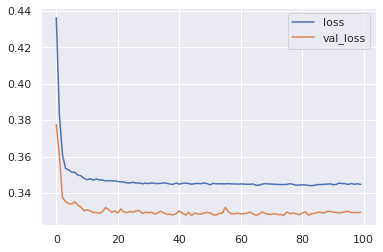

In [20]:
looses = pd.DataFrame(model.history.history)

looses.plot()

In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, (predictions > 0.5).astype("int32"))

array([[  7376,  18515],
       [     0, 106119]])

In [23]:
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       1.00      0.28      0.44     25891
           1       0.85      1.00      0.92    106119

    accuracy                           0.86    132010
   macro avg       0.93      0.64      0.68    132010
weighted avg       0.88      0.86      0.83    132010



## ANother Way


**Stratified K fold but no Dense Layer**


**This model Predicted correctly 44% of total False(0) values and 99.67% correctly of total True(1) values**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()

model.add(Dense(12, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [25]:
model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test))

Epoch 1/40
8251/8251 [==============================] - 17s 2ms/step - loss: 0.4096 - val_loss: 0.3736
Epoch 2/40
8251/8251 [==============================] - 16s 2ms/step - loss: 0.3661 - val_loss: 0.3618
Epoch 3/40
8251/8251 [==============================] - 17s 2ms/step - loss: 0.3564 - val_loss: 0.3424
Epoch 4/40
8251/8251 [==============================] - 15s 2ms/step - loss: 0.3277 - val_loss: 0.3106
Epoch 5/40
8251/8251 [==============================] - 17s 2ms/step - loss: 0.3046 - val_loss: 0.2988
Epoch 6/40
8251/8251 [==============================] - 16s 2ms/step - loss: 0.2973 - val_loss: 0.2939
Epoch 7/40
8251/8251 [==============================] - 16s 2ms/step - loss: 0.2910 - val_loss: 0.2896
Epoch 8/40
8251/8251 [==============================] - 18s 2ms/step - loss: 0.2849 - val_loss: 0.2857
Epoch 9/40
8251/8251 [==============================] - 16s 2ms/step - loss: 0.2818 - val_loss: 0.2851
Epoch 10/40
8251/8251 [==============================] - 17s 2ms/step - l

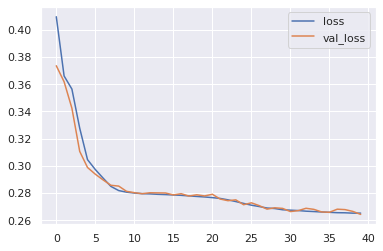

In [26]:
looses = pd.DataFrame(model.history.history)

looses.plot()

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, (predictions > 0.5).astype("int32"))

array([[ 11412,  14479],
       [   343, 105776]])

In [29]:
print(classification_report(y_test, (predictions > 0.5).astype("int32")))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     25891
           1       0.88      1.00      0.93    106119

    accuracy                           0.89    132010
   macro avg       0.93      0.72      0.77    132010
weighted avg       0.90      0.89      0.87    132010

